**Instituto Federal de Minas Gerais - Campus Ouro Preto**

**Disciplina:** Recuperação da Informação

**Professor:** Moisés

**Aluno:** Marco Antonio do Nascimento

**Orientações da atividade:** Seguindo a abordagem do código feito durante as aulas expositivas, ficando como sugestão apenas, você deve construir seu indexador para o contexto em que o seu coletor está atuando. A partir de todo o conteúdo coletado pelas tags que você escolheu, além da tag "a", é claro, para coletar os links que a página aponta, você vai implementar o seu indexador sob a abordagem de uma lista invertida (também chamada de índice invertido). Você deve também implementar uma forma de avaliar a força da palavra ao indexá-la na base de dados, ou seja, o quanto ela é rara na base, ou frequente em cada página, ou a relevância dela no conjunto de palavras de cada página, etc. Iremos conversar sobre isso na penúltima aula, antes de discutir sobre o buscador. Apenas como complemento, você deve estudar (ou até implementar) alguma forma para detectar a codificação das palavras e tratar isso durante a indexação (lembrando que essa forma de tratamento deve aparecer depois ao tratar as palavras de pesquisa). O seu Sistema de RI aqui pode ter apenas as classes envolvidas para a coleta e a indexação (em nossa aula, seriam Url, Coletor e Indexador) e um arquivo principal para acionar os respectivos objetos. Com tudo pronto, apenas submeta seu arquivo em pasta compactada para esta tarefa


**Resumo sobre o código criado**: O código que elaborei é uma implementação de um web crawler e indexador de palavras-chave, que utiliza diversas bibliotecas populares para realizar tarefas como requisições HTTP, scraping de HTML, processamento de texto e geração de nuvens de palavras.
Inicialmente, são importadas as bibliotecas necessárias, incluindo requests para fazer solicitações HTTP, BeautifulSoup para parsing de HTML, nltk para processamento de linguagem natural, wordcloud para criação de nuvens de palavras e matplotlib para plotagem. Em seguida, configuramos o NLTK para baixar os recursos necessários, como tokenizers e modelos de linguagem.
O código define uma lista de classes gramaticais que serão consideradas ao indexar palavras. Em seguida, são definidas três classes principais:
A classe Url simplesmente armazena uma URL.
A classe Coletor contém métodos para coletar o conteúdo HTML de uma URL e extrair links de uma página.
A classe Indexador indexa o conteúdo das páginas HTML, mantendo um índice invertido e a frequência das palavras. Também calcula o IDF (Inverse Document Frequency) de cada palavra e gera uma nuvem de palavras. 
O código então coleta o conteúdo da página principal da BBC, indexa-o e coleta os links das seções, repetindo o processo de indexação para cada seção. Por fim, uma nuvem de palavras é gerada e exibida com as palavras mais relevantes.


In [2]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import math

class Url:
    def __init__(self, url):
        self.url = url

class Coletor:
    def __init__(self):
        self.sessao = requests.Session()

    def coletar(self, url):
        resposta = self.sessao.get(url)
        soup = BeautifulSoup(resposta.text, 'html.parser')
        return soup

class Indexador:
    def __init__(self):
        self.indice_invertido = defaultdict(list)
        self.contagem_documentos = 0

    def indexar(self, soup, url):
        texto = soup.get_text()
        palavras = texto.split()
        self.contagem_documentos += 1

        for palavra in palavras:
            self.indice_invertido[palavra].append(url)

    def calcular_idf(self, palavra):
        df = len(self.indice_invertido[palavra])
        if df > 0:
            return math.log(self.contagem_documentos / df)
        return 0

# Exemplo de uso
if __name__ == "__main__":
    url = Url('https://www.bbc.com')
    coletor = Coletor()
    indexador = Indexador()

    soup = coletor.coletar(url.url)
    indexador.indexar(soup, url.url)

    for palavra, urls in indexador.indice_invertido.items():
        idf = indexador.calcular_idf(palavra)
        print(f'Palavra: {palavra} - IDF: {idf} - URLs: {urls}')


Palavra: BBC - IDF: -1.791759469228055 - URLs: ['https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com']
Palavra: Home - IDF: 0.0 - URLs: ['https://www.bbc.com']
Palavra: - - IDF: -2.3025850929940455 - URLs: ['https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com']
Palavra: Breaking - IDF: 0.0 - URLs: ['https://www.bbc.com']
Palavra: News, - IDF: -1.0986122886681098 - URLs: ['https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com']
Palavra: World - IDF: 0.0 - URLs: ['https://www.bbc.com']
Palavra: US - IDF: -2.639057329615259 - URLs: ['https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://www.bbc.com', 'https://w

In [5]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import re

class Url:
    def __init__(self, url):
        self.url = url

    def fetch_content(self):
        try:
            response = requests.get(self.url)
            return response.text
        except Exception as e:
            print("Error fetching content:", e)
            return None

class Coletor:
    def __init__(self):
        self.urls = []

    def adicionar_url(self, url):
        self.urls.append(Url(url))

    def coletar_contenido(self):
        conteudos = []
        for url in self.urls:
            conteudo = url.fetch_content()
            if conteudo:
                conteudos.append(conteudo)
        return conteudos

class Indexador:
    def __init__(self):
        self.index = defaultdict(list)
        self.stopwords = set([
            'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the', 'to', 'was', 'were', 'will', 'with'
        ])

    def indexar(self, conteudos):
        for conteudo in conteudos:
            soup = BeautifulSoup(conteudo, 'html.parser')
            text = soup.get_text()
            words = re.findall(r'\b\w+\b', text.lower())
            for position, word in enumerate(words):
                if word not in self.stopwords:
                    self.index[word].append(position)

if __name__ == "__main__":
    coletor = Coletor()
    coletor.adicionar_url('https://fundamentus.com.br')
    conteudos = coletor.coletar_contenido()

    indexador = Indexador()
    indexador.indexar(conteudos)
    print(indexador.index)


defaultdict(<class 'list'>, {'fundamentus': [0, 28, 30], 'invista': [1], 'consciente': [2, 15, 231, 252], 'busca': [3], 'por': [4, 8, 135], 'empresa': [5, 10, 159], 'fii': [6, 11, 22], 'procurar': [7], 'ação': [9], 'página': [12, 208, 249], 'inicial': [13, 250], 'investimento': [14, 69, 230, 251], 'mais': [16], 'opções': [17, 67], 'fatos': [18, 269], 'relevantes': [19, 270], 'últimos': [20, 256], 'resultados': [21, 156, 184, 257], 'pesquisar': [23], 'imóveis': [24], 'entre': [25, 253], 'em': [26, 142, 200, 254], 'contato': [27, 255], 'mobile': [29], 'é': [31], 'um': [32, 50], 'sistema': [33], 'line': [35], 'que': [36, 76, 91, 117], 'disponibiliza': [37], 'informações': [38], 'financeiras': [39], 'e': [40, 87, 137, 153, 181, 192], 'fundamentalistas': [41, 86], 'das': [42, 89, 109, 165, 167, 175, 185, 245], 'empresas': [43, 90, 110, 114, 134, 186, 246], 'com': [44, 172], 'ações': [45, 168], 'listadas': [46], 'na': [47, 228, 241], 'bovespa': [48], 'possuímos': [49], 'completo': [51], 'ban

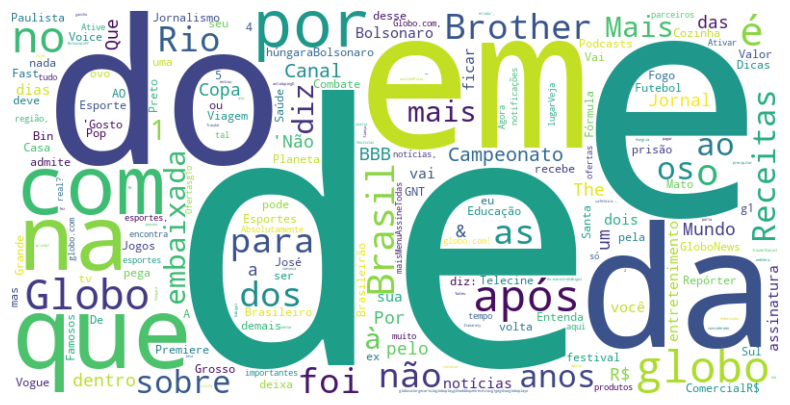

In [9]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt

class Url:
    def __init__(self, url):
        self.url = url

class Coletor:
    def __init__(self):
        self.sessao = requests.Session()

    def coletar(self, url):
        resposta = self.sessao.get(url)
        soup = BeautifulSoup(resposta.text, 'html.parser')
        return soup

class Indexador:
    def __init__(self):
        self.indice_invertido = defaultdict(list)
        self.contagem_documentos = 0
        self.frequencia_palavras = defaultdict(int)

    def indexar(self, soup, url):
        texto = soup.get_text()
        palavras = texto.split()
        self.contagem_documentos += 1

        for palavra in palavras:
            self.indice_invertido[palavra].append(url)
            self.frequencia_palavras[palavra] += 1

    def calcular_idf(self, palavra):
        df = len(self.indice_invertido[palavra])
        if df > 0:
            return math.log(self.contagem_documentos / df)
        return 0

    def gerar_nuvem_palavras(self):
        nuvem = WordCloud(width=800, height=400, background_color='white')
        nuvem.generate_from_frequencies(self.frequencia_palavras)
        plt.figure(figsize=(10, 5))
        plt.imshow(nuvem, interpolation='bilinear')
        plt.axis('off')
        plt.show()

# Exemplo de uso
if __name__ == "__main__":
    url = Url('http://globo.com')
    coletor = Coletor()
    indexador = Indexador()

    soup = coletor.coletar(url.url)
    indexador.indexar(soup, url.url)

    # Gerar e exibir a nuvem de palavras
    indexador.gerar_nuvem_palavras()


In [13]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Baixe as stopwords e o tokenizer do NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Defina as classes gramaticais que deseja incluir na nuvem de palavras
classes_gramaticais = {'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS'}

class Url:
    def __init__(self, url):
        self.url = url

class Coletor:
    def __init__(self):
        self.sessao = requests.Session()

    def coletar(self, url):
        resposta = self.sessao.get(url)
        soup = BeautifulSoup(resposta.text, 'html.parser')
        return soup

class Indexador:
    def __init__(self):
        self.indice_invertido = defaultdict(list)
        self.contagem_documentos = 0
        self.frequencia_palavras = defaultdict(int)
        self.stopwords_pt = set(stopwords.words('portuguese'))

    def indexar(self, soup, url):
        texto = soup.get_text()
        palavras = word_tokenize(texto, language='portuguese')
        self.contagem_documentos += 1

        for palavra in palavras:
            if palavra.lower() not in self.stopwords_pt:
                tagged = pos_tag([palavra], lang='por')
                if tagged[0][1] in classes_gramaticais:
                    self.indice_invertido[palavra].append(url)
                    self.frequencia_palavras[palavra] += 1

    def calcular_idf(self, palavra):
        df = len(self.indice_invertido[palavra])
        if df > 0:
            return math.log(self.contagem_documentos / df)
        return 0

    def gerar_nuvem_palavras(self):
        nuvem = WordCloud(width=800, height=400, background_color='white')
        nuvem.generate_from_frequencies(self.frequencia_palavras)
        plt.figure(figsize=(10, 5))
        plt.imshow(nuvem, interpolation='bilinear')
        plt.axis('off')
        plt.show()

# Exemplo de uso
if __name__ == "__main__":
    url = Url('http://globo.com')
    coletor = Coletor()
    indexador = Indexador()

    soup = coletor.coletar(url.url)
    indexador.indexar(soup, url.url)

    # Gerar e exibir a nuvem de palavras
    indexador.gerar_nuvem_palavras()


[nltk_data] Downloading package punkt to C:\Users\Marco
[nltk_data]     Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marco Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Marco
[nltk_data]     Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NotImplementedError: Currently, NLTK pos_tag only supports English and Russian (i.e. lang='eng' or lang='rus')

[nltk_data] Downloading package punkt to C:\Users\Marco
[nltk_data]     Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marco Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Marco
[nltk_data]     Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


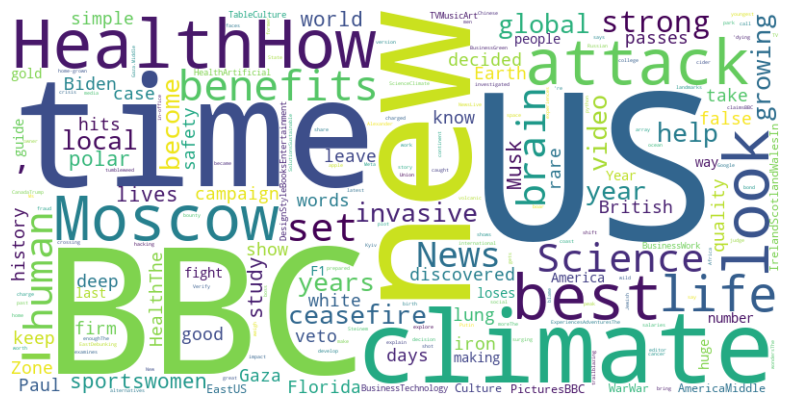

In [14]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Baixe as stopwords e o tokenizer do NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Defina as classes gramaticais que deseja incluir na nuvem de palavras
classes_gramaticais = {'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS'}

class Url:
    def __init__(self, url):
        self.url = url

class Coletor:
    def __init__(self):
        self.sessao = requests.Session()

    def coletar(self, url):
        resposta = self.sessao.get(url)
        soup = BeautifulSoup(resposta.text, 'html.parser')
        return soup

class Indexador:
    def __init__(self):
        self.indice_invertido = defaultdict(list)
        self.contagem_documentos = 0
        self.frequencia_palavras = defaultdict(int)
        self.stopwords_en = set(stopwords.words('english'))

    def indexar(self, soup, url):
        texto = soup.get_text()
        palavras = word_tokenize(texto, language='english')
        self.contagem_documentos += 1

        for palavra in palavras:
            if palavra.lower() not in self.stopwords_en:
                tagged = pos_tag([palavra])
                if tagged[0][1] in classes_gramaticais:
                    self.indice_invertido[palavra].append(url)
                    self.frequencia_palavras[palavra] += 1

    def calcular_idf(self, palavra):
        df = len(self.indice_invertido[palavra])
        if df > 0:
            return math.log(self.contagem_documentos / df)
        return 0

    def gerar_nuvem_palavras(self):
        nuvem = WordCloud(width=800, height=400, background_color='white')
        nuvem.generate_from_frequencies(self.frequencia_palavras)
        plt.figure(figsize=(10, 5))
        plt.imshow(nuvem, interpolation='bilinear')
        plt.axis('off')
        plt.show()

# Exemplo de uso
if __name__ == "__main__":
    url = Url('http://www.bbc.com')
    coletor = Coletor()
    indexador = Indexador()

    soup = coletor.coletar(url.url)
    indexador.indexar(soup, url.url)

    # Gerar e exibir a nuvem de palavras
    indexador.gerar_nuvem_palavras()


[nltk_data] Downloading package punkt to C:\Users\Marco
[nltk_data]     Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marco Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Marco
[nltk_data]     Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


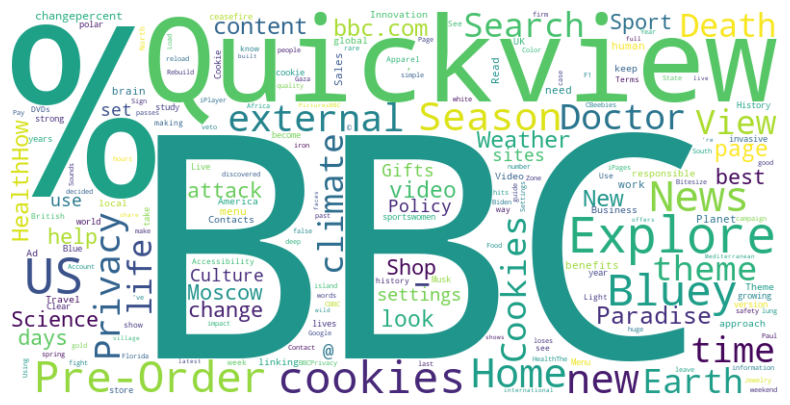

In [15]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Baixe as stopwords e o tokenizer do NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Defina as classes gramaticais que deseja incluir na nuvem de palavras
classes_gramaticais = {'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS'}

class Url:
    def __init__(self, url):
        self.url = url

class Coletor:
    def __init__(self):
        self.sessao = requests.Session()

    def coletar(self, url):
        resposta = self.sessao.get(url)
        soup = BeautifulSoup(resposta.text, 'html.parser')
        return soup

    def coletar_links(self, soup):
        links = soup.find_all('a', href=True)
        urls = [link['href'] for link in links if 'bbc.com' in link['href']]
        return urls

class Indexador:
    def __init__(self):
        self.indice_invertido = defaultdict(list)
        self.contagem_documentos = 0
        self.frequencia_palavras = defaultdict(int)
        self.stopwords_en = set(stopwords.words('english'))

    def indexar(self, soup, url):
        texto = soup.get_text()
        palavras = word_tokenize(texto, language='english')
        self.contagem_documentos += 1

        for palavra in palavras:
            if palavra.lower() not in self.stopwords_en:
                tagged = pos_tag([palavra])
                if tagged[0][1] in classes_gramaticais:
                    self.indice_invertido[palavra].append(url)
                    self.frequencia_palavras[palavra] += 1

    def calcular_idf(self, palavra):
        df = len(self.indice_invertido[palavra])
        if df > 0:
            return math.log(self.contagem_documentos / df)
        return 0

    def gerar_nuvem_palavras(self):
        nuvem = WordCloud(width=800, height=400, background_color='white')
        nuvem.generate_from_frequencies(self.frequencia_palavras)
        plt.figure(figsize=(10, 5))
        plt.imshow(nuvem, interpolation='bilinear')
        plt.axis('off')
        plt.show()

# Exemplo de uso
if __name__ == "__main__":
    url_principal = Url('http://www.bbc.com')
    coletor = Coletor()
    indexador = Indexador()

    # Coletar conteúdo da página principal
    soup_principal = coletor.coletar(url_principal.url)
    indexador.indexar(soup_principal, url_principal.url)

    # Coletar e processar links das seções
    links_secoes = coletor.coletar_links(soup_principal)
    for link in links_secoes:
        soup_secao = coletor.coletar(link)
        indexador.indexar(soup_secao, link)

    # Gerar e exibir a nuvem de palavras
    indexador.gerar_nuvem_palavras()
